In [1]:
import numpy as np
from scipy.stats import entropy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, cm

In [2]:
tag_dists = [
    (2, ['final_2_med_8819156_tag_dist.npy','final_2_med_8819157_tag_dist.npy','final_2_med_8833070_tag_dist.npy']),
    (4, ['final_4_med_8819158_tag_dist.npy','final_4_med_8819159_tag_dist.npy','final_4_med_8819160_tag_dist.npy']),
    (8, ['final_8_med_8819161_tag_dist.npy','final_8_med_8819162_tag_dist.npy','final_8_med_8819163_tag_dist.npy']),
    (16, ['final_16_med_8819164_tag_dist.npy','final_16_med_8819165_tag_dist.npy','final_16_med_8819166_tag_dist.npy']),
    (32, ['final_32_med_8819169_tag_dist.npy','final_32_med_8819170_tag_dist.npy','final_32_med_8819171_tag_dist.npy']),
    (64, ['final_64_med_8821183_tag_dist.npy','final_64_med_8821184_tag_dist.npy','final_64_med_8821185_tag_dist.npy']),
    (128, ['final_128_med_9361985_tag_dist.npy','final_128_med_9361999_tag_dist.npy','final_128_med_9381893_tag_dist.npy']),
    (256, ['final_256_med_9361979_tag_dist.npy','final_256_med_9381895_tag_dist.npy','final_256_med_9381896_tag_dist.npy'])
]

In [3]:
def padarray(A, size):
    t = size - len(A)
    return np.pad(A, pad_width=(0, t), mode='constant', constant_values=(0, np.nan))

In [10]:
cmap = cm.get_cmap('plasma', len(tag_dists))
hue_map = np.linspace(0.1, 0.9, len(tag_dists) + 1)
entropies = []
for i, (cats, dists) in enumerate(tag_dists):
    for dist in dists:
        dist = np.load(f'../models/tagdists/{dist}')
        entropies.append((cats, entropy(dist.T, base=2)[1:], hue_map[i]))

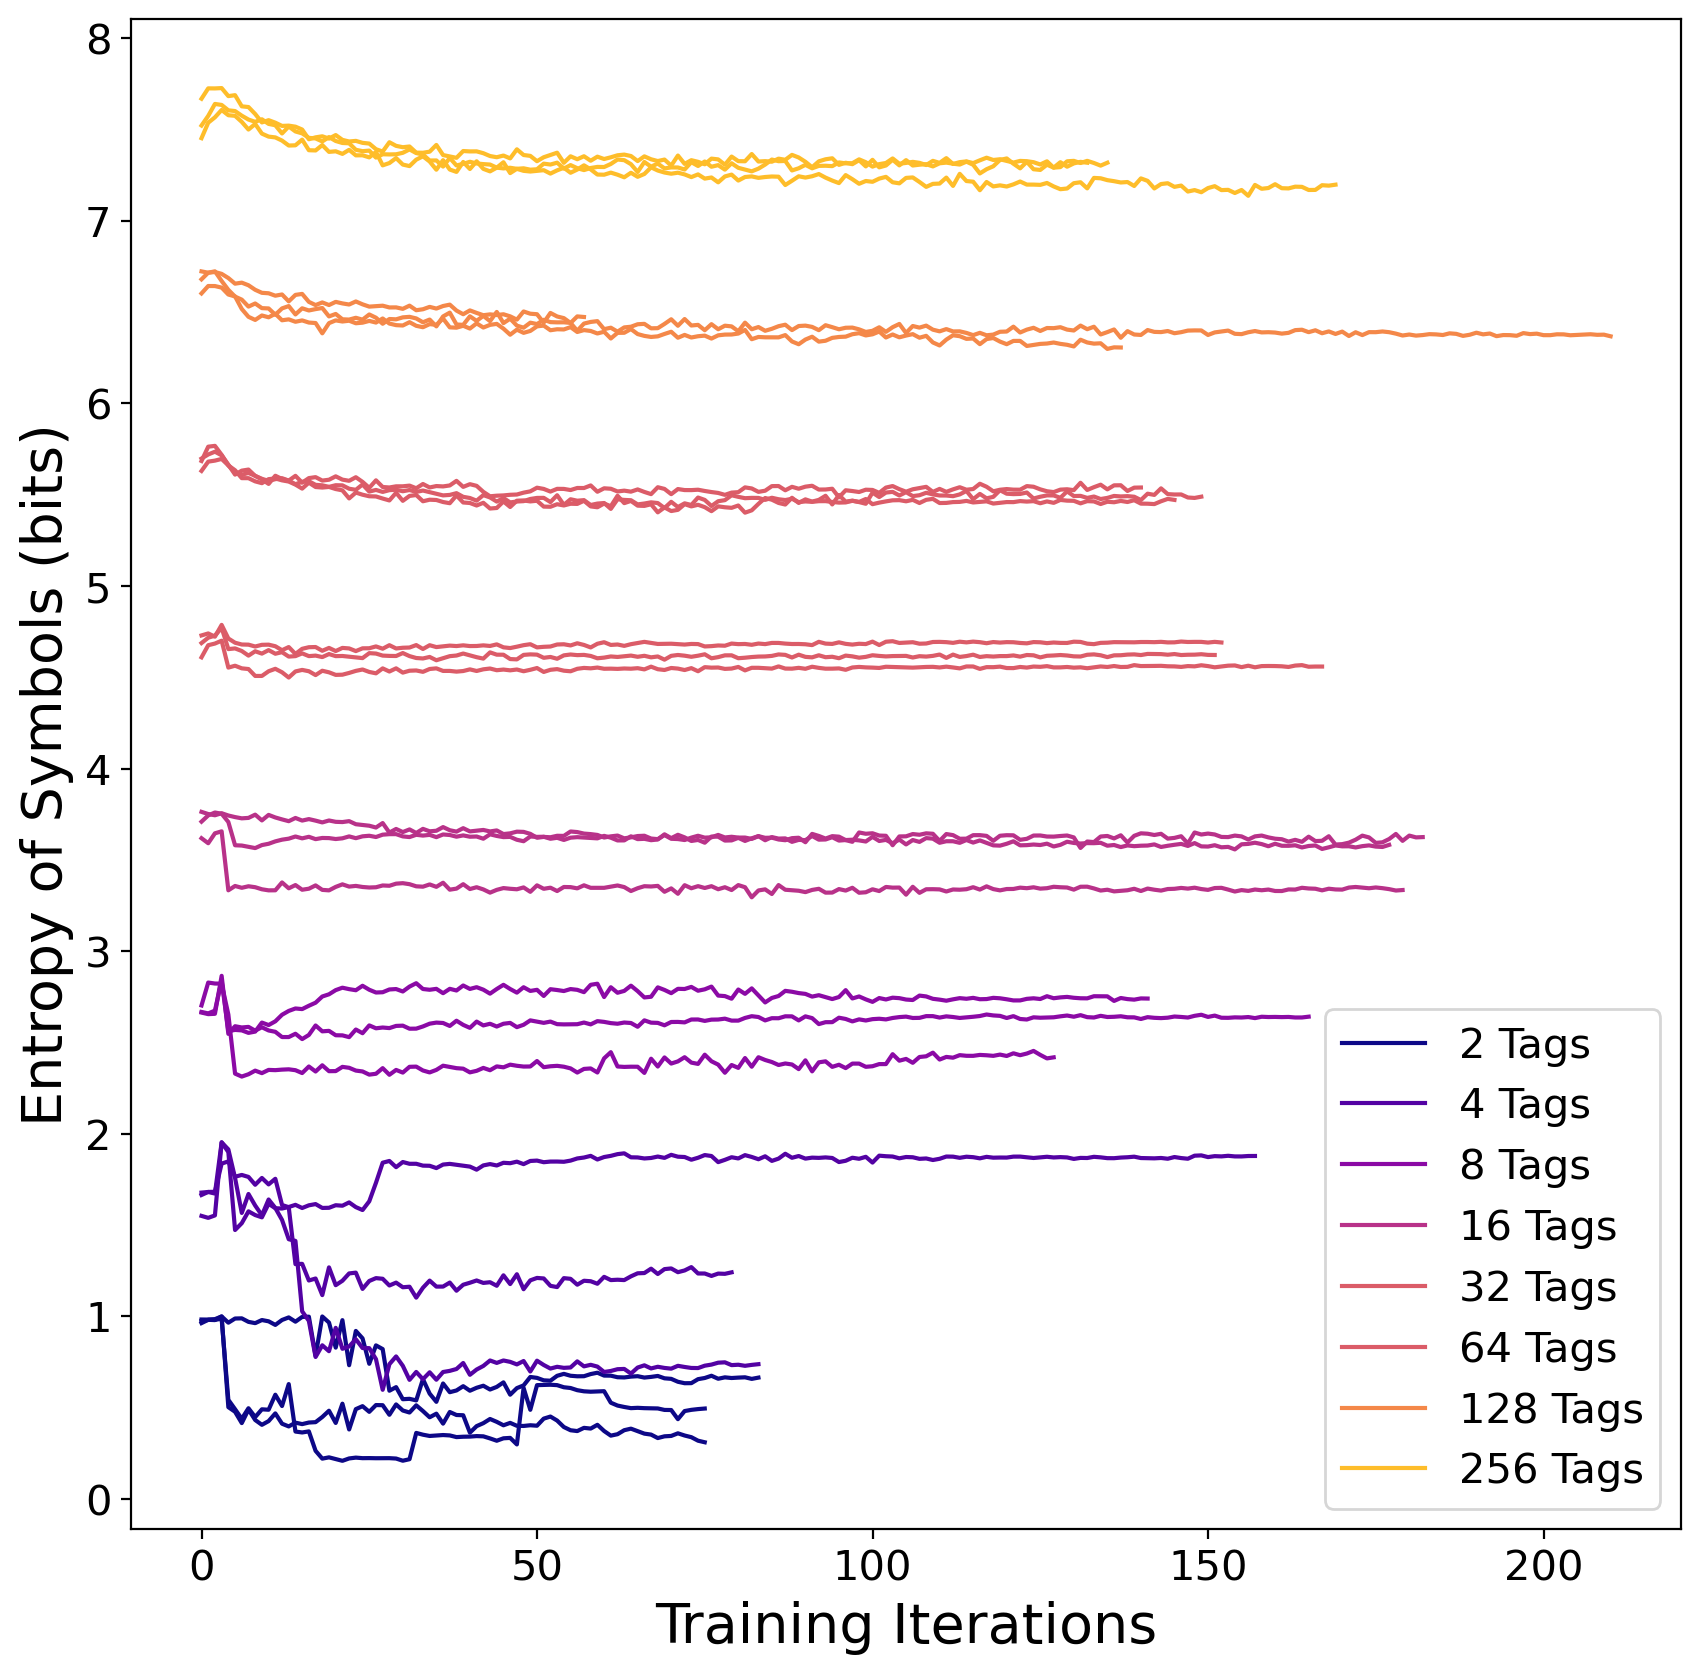

In [11]:
max_len = max(len(ent[1]) for ent in entropies)
qes = np.arange(max_len)
plt.figure(figsize=(10, 10), dpi=200)
for cats, ent, col in entropies:
    ent = padarray(ent, max_len)
    plt.plot(qes, ent, label = f"{cats} Tags", color=cmap(col))
    
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = []
new_handles = []
for handle, label in zip(handles, labels):
    if label not in new_labels:
        new_handles.append(handle)
        new_labels.append(label)
plt.legend(new_handles, new_labels, loc='best', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Training Iterations', fontsize=20)
plt.ylabel('Entropy of Symbols (bits)', fontsize=20)
# plt.title('Entropy of the Derived Tagsets of Different Sized Models')
plt.show()